<a href="https://colab.research.google.com/github/janicewee/STB/blob/main/STB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the excel spreadsheet into Pandas for preliminary checks

In [ ]:
import pandas as pd

# Raw URL to Excel file on GitHub
url = 'https://raw.githubusercontent.com/janicewee/STB/main/data.xlsx'

# Read the Excel file directly from the URL
df = pd.read_excel(url, sheet_name='data')

# Display the first few rows to confirm it loaded
df.head()

# Provide basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22974 entries, 0 to 22973
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   case                                                 22972 non-null  float64
 1   year                                                 22974 non-null  int64  
 2   month                                                22974 non-null  int64  
 3   Country of Residence                                 22974 non-null  object 
 4   City of Residence                                    22962 non-null  object 
 5   Purpose of Visit                                     20641 non-null  object 
 6   Main Purpose of Visit                                22974 non-null  object 
 7   Weights_QTR                                          22974 non-null  float64
 8   Air_Terminal                                         17977 non-nul

Data Analysis and Issue Detection .
This code can be run on its own as I'll import the necessary libraries and file again.


Shape: (22974, 51)
Columns: ['case', 'year', 'month', 'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender', 'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'Designation (free text)', 'shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness', 'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'c4a_1', 'MainHotel', 'Travel companion - Alone', 'Travel companion - Spouse', 'Travel companion - Your Child/Children', 'Travel companion - Parents/Parents-in-law', 'Travel companion - Grandparents/Grandparents-in-law', 'Travel companion - Siblings', 'Travel companion - Other relatives', 'Travel companion - Friends', 'Travel 

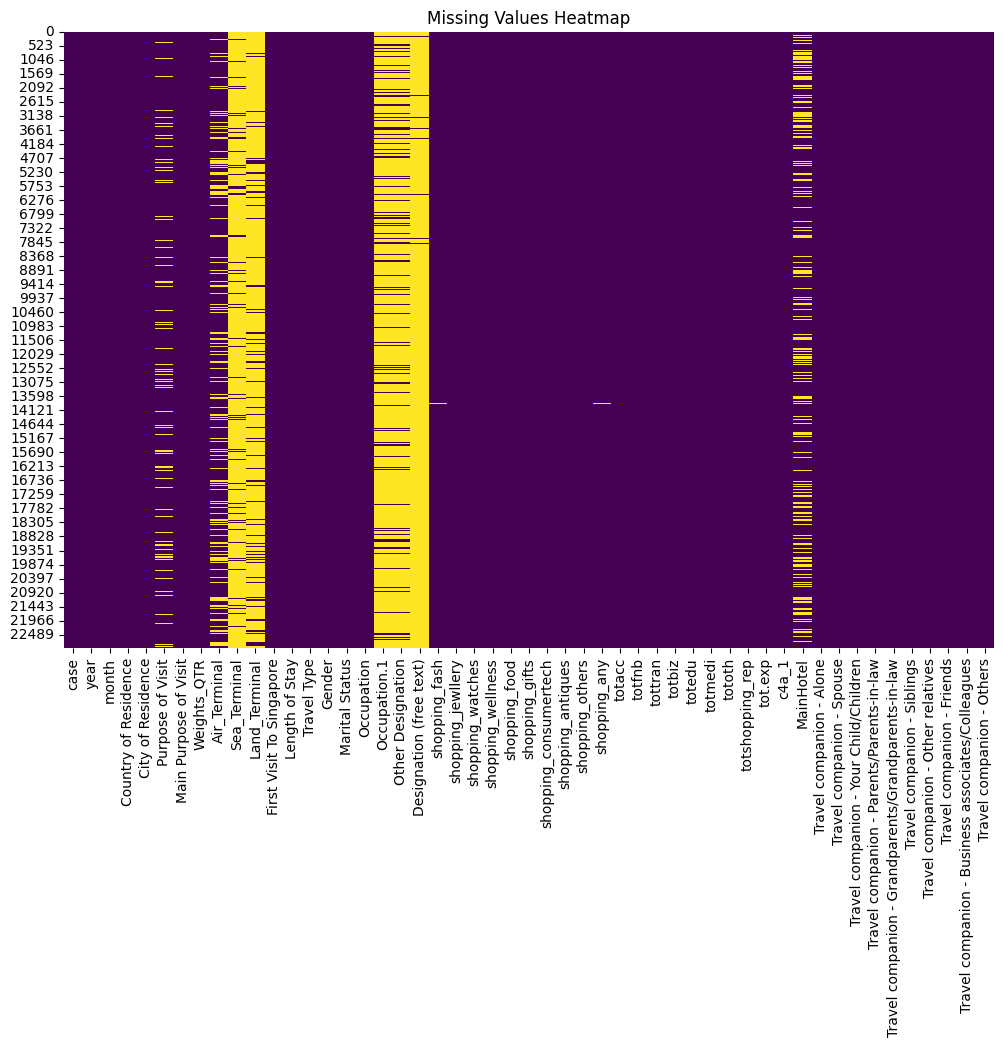

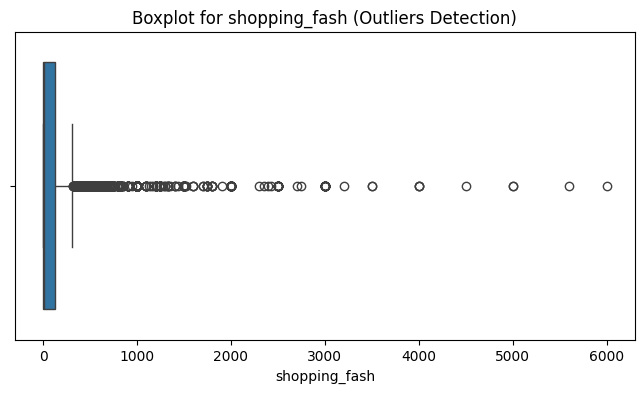

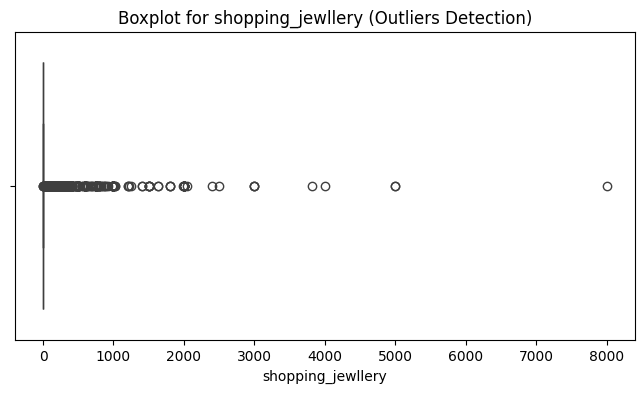

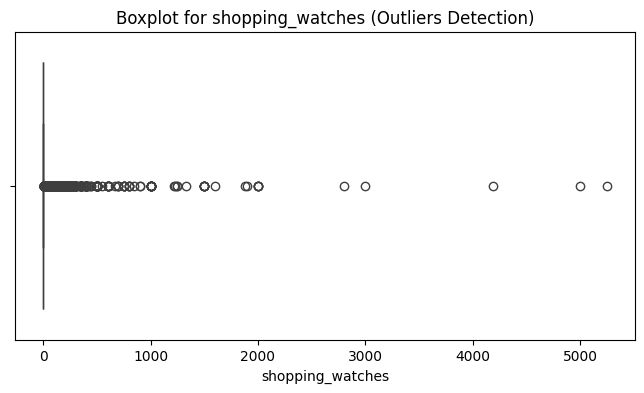

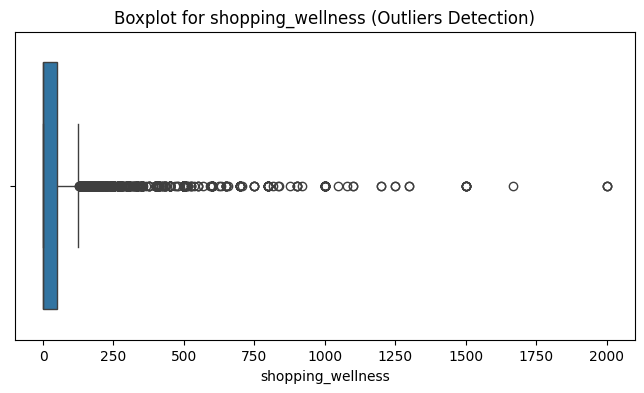

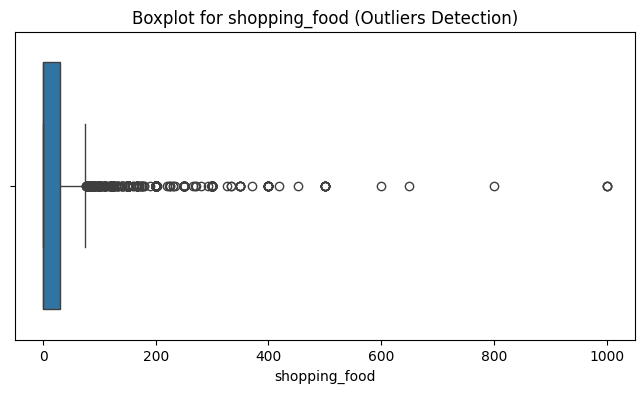

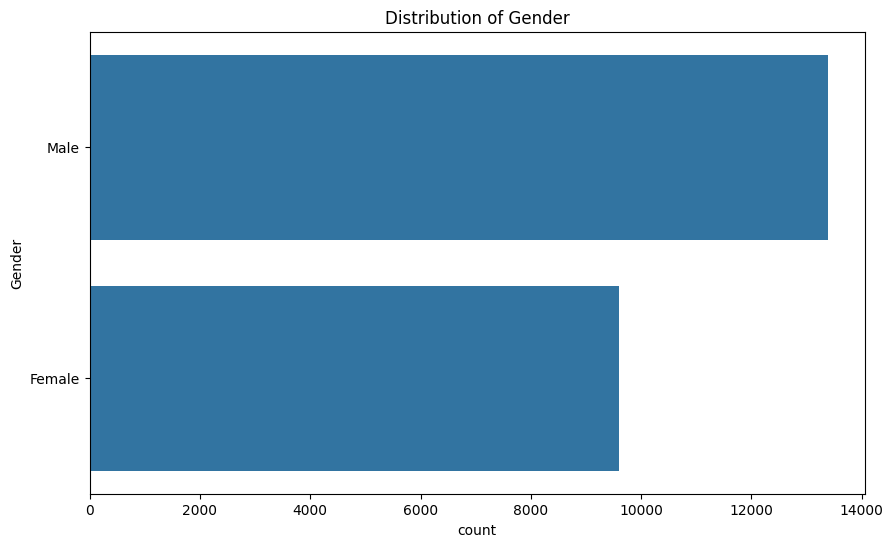

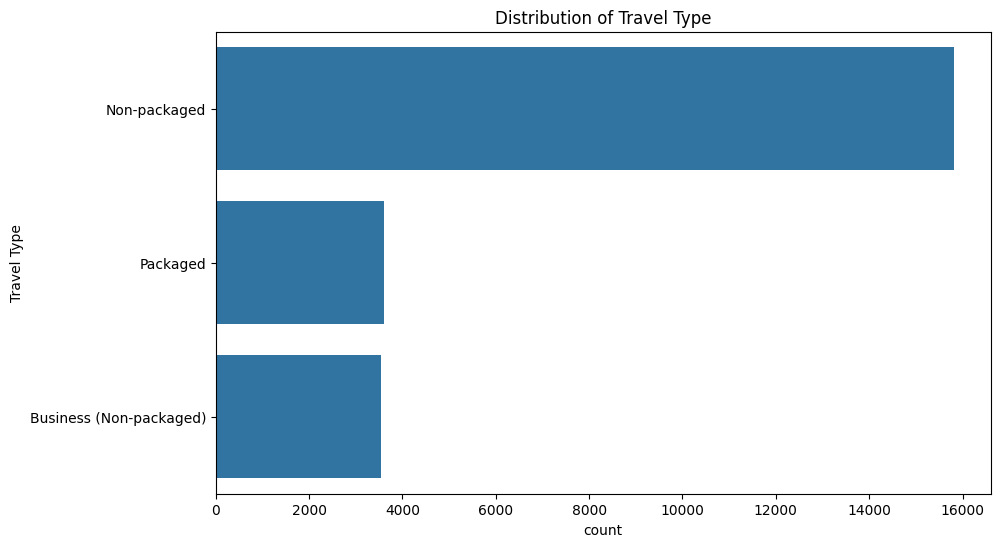

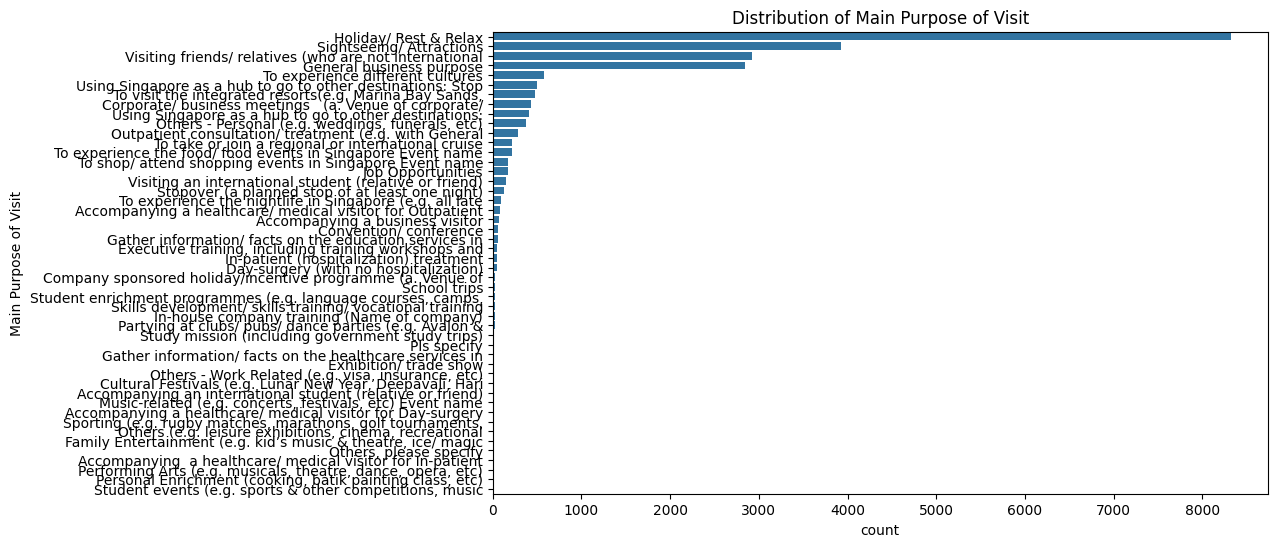


Columns with >90% missing values (will be dropped):
['Designation (free text)']
Number of columns dropped: 1

Shape after dropping high-missing columns: (22974, 50)
Shape after removing duplicates: (22974, 50)

Final cleaned shape: (22974, 50)
Remaining missing values:
 0

Columns kept for analysis: ['case', 'year', 'month', 'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender', 'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness', 'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'c4a_1', 'MainHotel', 'Travel companion - Alone', 'Travel companion - Spouse', 'T

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = 'https://raw.githubusercontent.com/janicewee/STB/main/data.xlsx'
df = pd.read_excel(url)  # If multiple sheets, add sheet_name='Sheet1'



# 1. Basic Overview (already provided, but re-run for confirmation)
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Data Types:\n', df.dtypes)
print('Missing Values:\n', df.isnull().sum())
print('Duplicates:', df.duplicated().sum())

# 2. Summary Statistics (for all columns, including categorical)
print('Summary Statistics:\n', df.describe(include='all'))

# 3. Check Unique Values for Key Categorical/Object Columns
# Selected based on your columns: Gender, Marital Status, Occupation, Travel Type, etc.
categorical_cols = [
    'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit',
    'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Travel Type', 'Gender',
    'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'Designation (free text)'
]

for col in categorical_cols:
    if col in df.columns:
        print(f'\nUnique values in {col} (count: {df[col].nunique()}):\n', df[col].value_counts(dropna=False))

# 4. Detect Outliers in Key Numeric/Float Columns
# Focus on float64 and relevant int64: shopping_*, tot*, Length of Stay, etc.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['year', 'month', 'c4a_1']]  # Exclude non-variable like year/month

for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        if not outliers.empty:
            print(f'\nOutliers in {col} (count: {len(outliers)}):\n', outliers[[col]].describe())

# 5. Check for Zeros in Float64 Columns - I want to see whether a lot of values in Shopping and Tot are zero
float_cols = df.select_dtypes(include='float64').columns
zero_counts = (df[float_cols] == 0).sum()
zero_counts = zero_counts[zero_counts > 0].sort_values(ascending=False)
print('\nZeros in Float64 Columns:\n', zero_counts)

# 6. Visualizations
# Missing Values Heatmap (useful given high missing in some columns like Sea_Terminal)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Boxplots for Key Numeric Columns (e.g., shopping and total spends)
key_spend_cols = [col for col in float_cols if 'shopping_' in col or 'tot' in col]
for col in key_spend_cols[:5]:  # Limit to first 5 for brevity; adjust as needed
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Outliers Detection)')
    plt.show()

# Distribution of Categorical (e.g., Gender, Travel Type)
for col in ['Gender', 'Travel Type', 'Main Purpose of Visit']:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()

# 7. Address Issues (Cleaning Steps)
df_clean = df.copy()  # Start with a fresh copy

# Step 1: Identify and drop columns with >90% missing values because I do not want to analyze them
missing_percentage = df_clean.isnull().mean()
high_missing = missing_percentage[missing_percentage > 0.9].index

print('\nColumns with >90% missing values (will be dropped):')
print(high_missing.tolist())
print(f'Number of columns dropped: {len(high_missing)}')

# Drop them permanently
df_clean = df_clean.drop(columns=high_missing)

# Update categorical and numeric column lists to exclude dropped columns
categorical_cols = [col for col in categorical_cols if col in df_clean.columns]
float_cols = df_clean.select_dtypes(include='float64').columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f'\nShape after dropping high-missing columns: {df_clean.shape}')

# Step 2: Drop duplicates (if any)
df_clean = df_clean.drop_duplicates()
print(f'Shape after removing duplicates: {df_clean.shape}')

# Step 3: Handle remaining missing values (only on kept columns)

# - Categorical/object columns: Fill with 'Unknown'
object_cols = df_clean.select_dtypes(include='object').columns
for col in object_cols:
    df_clean[col] = df_clean[col].fillna('Unknown')

# - Numeric columns:
#   For spending-related (shopping_*, tot*), fill with 0 (meaning no spend)
#   For others (e.g., Weights_QTR, Air_Terminal, MainHotel), fill with median
spending_cols = [col for col in df_clean.columns if col.startswith('shopping_') or col.startswith('tot')]
other_numeric_cols = [col for col in numeric_cols if col not in spending_cols]

for col in spending_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

for col in other_numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Step 4: Standardize categorical text (strip spaces, lowercase)
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# Step 5: Basic validation and outlier handling (only on remaining numeric columns)
# Ensure non-negative for spend columns
for col in spending_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].clip(lower=0)

# Winsorize extreme outliers (1st and 99th percentile) for spend columns
for col in spending_cols:
    if col in df_clean.columns:
        lower = df_clean[col].quantile(0.01)
        upper = df_clean[col].quantile(0.99)
        df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)

# Final check
print('\nFinal cleaned shape:', df_clean.shape)
print('Remaining missing values:\n', df_clean.isnull().sum().sum())  # Should be 0
print('\nColumns kept for analysis:', df_clean.columns.tolist())

df.info()

Save the cleaned up file as csv for future use

In [7]:
# Export the cleaned DataFrame to CSV
csv_filename = 'cleaned_survey_data.csv'

df_clean.to_csv(csv_filename, index=False)  # index=False to avoid saving row numbers

print(f"Cleaned data saved as {csv_filename}")
print(f"Shape of exported data: {df_clean.shape}")

Cleaned data saved as cleaned_survey_data.csv
Shape of exported data: (22974, 50)


Create a download link

In [8]:
from google.colab import files

# Trigger automatic download to your local computer
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>